In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers



In [13]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [8]:
img_width = 180
img_height = 180

In [9]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [63]:
data_cat = data_train.class_names

In [14]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height, img_width),
                                                       batch_size=32,
                                                       shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [15]:
data_test = tf.keras.utils.image_dataset_from_directory(data_test_path,
                                                       image_size=(img_height, img_width),
                                                       batch_size=32,
                                                       shuffle=False,
                                                       validation_split=False)

Found 359 files belonging to 36 classes.


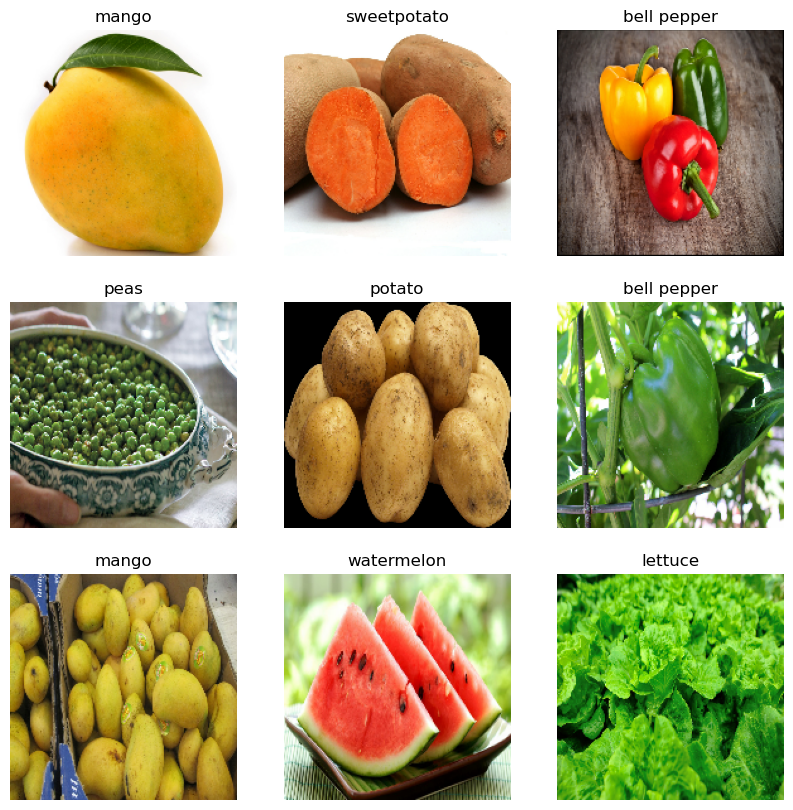

In [21]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [26]:
from tensorflow.keras.models import Sequential

model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [29]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [30]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 313ms/step - accuracy: 0.0706 - loss: 3.9508 - val_accuracy: 0.3932 - val_loss: 2.3065
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 285ms/step - accuracy: 0.2724 - loss: 2.5290 - val_accuracy: 0.5613 - val_loss: 1.5952
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 286ms/step - accuracy: 0.3994 - loss: 2.0597 - val_accuracy: 0.6866 - val_loss: 1.2026
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 263ms/step - accuracy: 0.5452 - loss: 1.6127 - val_accuracy: 0.8034 - val_loss: 0.9067
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 251ms/step - accuracy: 0.6832 - loss: 1.1376 - val_accuracy: 0.9060 - val_loss: 0.4588
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 25s 247ms/step - accuracy: 0.8015 - loss: 0.6769 - val_accuracy: 0.9060 - val_loss: 0.5080
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 254ms/step - accuracy: 0.8912 - loss: 0.3834 - val_accuracy: 0.9345 - val_loss: 0.4390
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 248ms/step - accuracy: 0.9006 - loss: 0.3441 - val_accu

Text(0.5, 1.0, 'Loss')

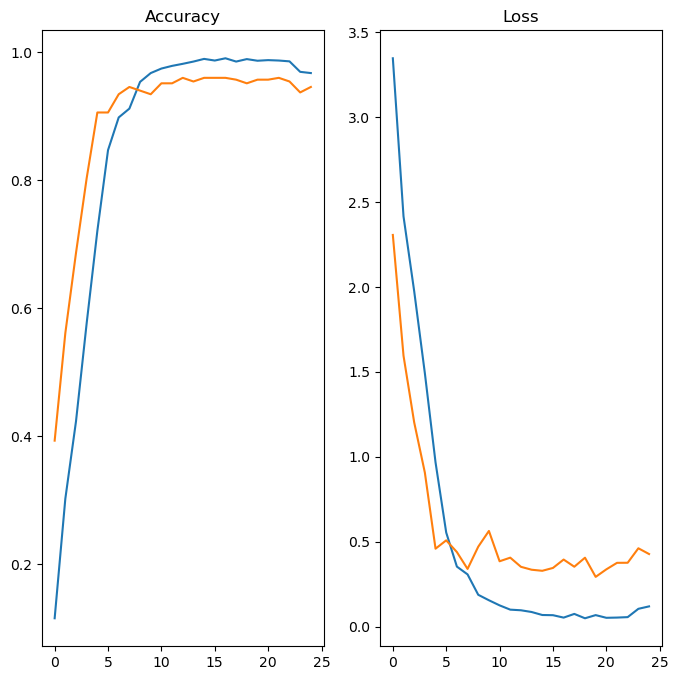

In [32]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label = 'Training accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label = "Validation accuracy")
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'], label = 'Training loss')
plt.plot(epochs_range, history.history['val_loss'], label = "Validation loss")
plt.title('Loss')

In [58]:
image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [34]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


In [35]:
score = tf.nn.softmax(predict)

In [59]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is apple with accuracy of 99.91


In [60]:
model.save('Image_classify.keras')